# Exploratory Analysis of the World's Gross Domestic Product (GDP) 


## by Hassanat Awodipe (03.08.2022)

## Investigation Overview

I explored the world's GDP from 2001 to 2018. I examined the effect of Population on GDP and how GDP is distributed by Income class and regions of the world.

## Dataset Overview

The dataset contained 3,072 observations of economic features from 172 unique countries. These features include exports, imports, gross national savings and expendtiure, total natural resources rents and inflation. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
economy = pd.read_csv('WorldGDP.csv')

In [3]:
# create an order for the income class
income_class = ['High income', 'Upper-middle income', 'Lower-middle income', 'Low income']
income_order = pd.api.types.CategoricalDtype(ordered=True, categories=income_class)
economy['Income Class'] = economy['Income Class'].astype(income_order)

# choose a uniform color for the bars
base_color = sb.color_palette()[0]

## What is GDP?

**GDP**, Gross Domestic Product, is the total income accrued from goods and services produced in a country for a given period of time. 

## Distribution of GDP

GDP had a long tail with a lot of smaller values and few values on the high side. When plotted on a log scale, the distribution appeared normal with the highest count of GDPs in 10B range. 

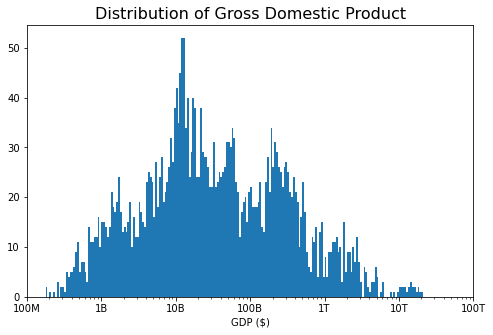

In [4]:
# adjust the scale to a log scale
plt.figure(figsize=[8, 5])

log_binsize = 0.025
bins = 10 ** np.arange(0.9, np.log10(economy['GDP'].max())+log_binsize, log_binsize)

plt.hist(economy['GDP'], bins=bins)
plt.xscale('log')
plt.xlim(10**8, 10**14)
plt.xticks([10**8, 10**9, 10**10, 10**11, 10**12, 10**13, 10**14], ['100M', '1B', '10B', '100B', '1T', '10T', '100T'])
plt.xlabel('GDP ($)')
plt.title('Distribution of Gross Domestic Product', fontsize=16)

plt.show()

## Growth of GDP and Population from 2001 - 2018

Since 2001, there has been an increase in GDP and Population. However, in 2009 and 2015, there was a fall in GDP.

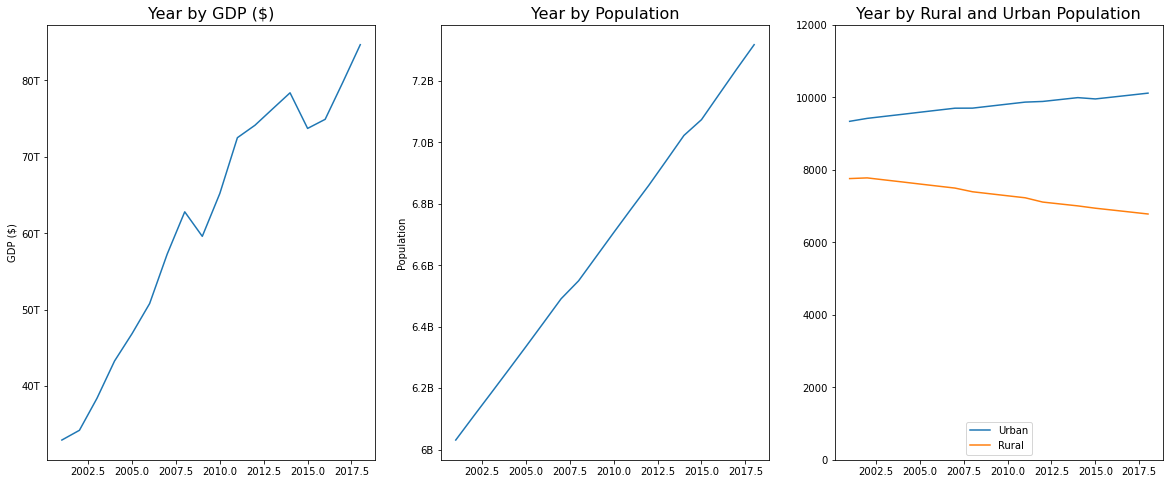

By examining based on the population types, we can see that the specific increase in Urban population may be related to that of GDP. 
 
Also interesting to see that the migration from Rural areas to Urban areas continues to grow


In [5]:
# comparison of GDP and Population Growth
plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.plot(economy.groupby(['Year'])['GDP'].sum())
plt.title('Year by GDP ($)', fontsize=16)
plt.yticks([4*10**13, 5*10**13, 6*10**13, 7*10**13, 8*10**13], 
            ['40T', '50T', '60T', '70T', '80T'])
plt.ylabel('GDP ($)')

plt.subplot(1, 3, 2)
plt.plot(economy.groupby(['Year'])['Population'].sum())
plt.title('Year by Population', fontsize=16)
plt.yticks([6.0*10**9, 6.2*10**9, 6.4*10**9, 6.6*10**9, 6.8*10**9, 7.0*10**9, 7.2*10**9], 
            ['6B', '6.2B', '6.4B', '6.6B', '6.8B', '7.0B', '7.2B'])
plt.ylabel('Population')

plt.subplot(1, 3, 3)
plt.plot(economy.groupby(['Year'])['Urban population'].sum(), label='Urban')
plt.plot(economy.groupby(['Year'])['Rural population'].sum(), label='Rural')
plt.ylim(0, 12000)
plt.title('Year by Rural and Urban Population', fontsize=16)
plt.legend(loc='lower center')

plt.show()

print('By examining based on the population types, we can see that the specific increase in Urban population may be related to that of GDP. \n \nAlso interesting to see that the migration from Rural areas to Urban areas continues to grow')

## Close Examination of the Fall of GDP in 2015

Although the outliers above the maximum GDP values increased yearly. GDP fell in 2015 then rose again in 2017.

In [6]:
# subset the data for the years from 2010
gdp_year = economy[economy['Year'] > 2009]

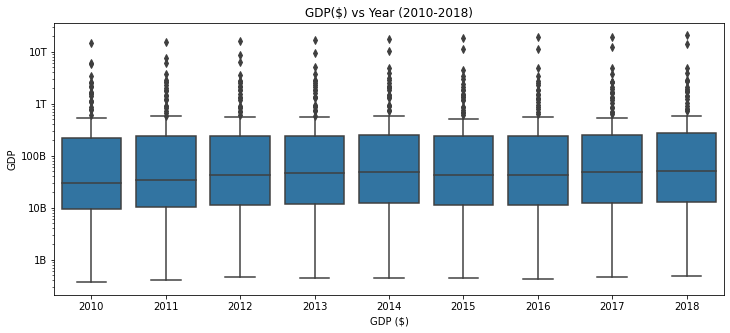

GDP fell in 2015:The drop can be seen in the 25th percentile, median and 75th percentile lines


In [7]:
# use a log scale for the GDP axis
plt.figure(figsize=(12,5))

sb.boxplot(data=gdp_year, x='Year', y='GDP', color=base_color)

plt.yscale('log') 
plt.yticks([ 10**9, 10**10, 10**11, 10**12, 10**13], ['1B', '10B', '100B', '1T', '10T'])
plt.xlabel('GDP ($)')
plt.title('GDP($) vs Year (2010-2018)')
plt.show()

print('GDP fell in 2015:The drop can be seen in the 25th percentile, median and 75th percentile lines')

To understand the cause of the fall of the GDP, I examined two of the factors, imports and inflation, that were negatively correlated with it. They showed no conclusive insights and this was because they had a weak correlation with GDP. I concluded that a non linear correlation may be needed to understand the cause.

The second part of the analysis involved the distribution of GDP by income class and regions. 

## GDP and Population Distribution by Income Class

For each of the income classes, the distribution gets smaller as the GDP increases. Likewise Population.

In [8]:
# create an order for the regions
reg_order = economy.groupby(['Regions'])['GDP'].max().sort_values(ascending=False).index
mean_pop_order = economy.groupby(['Regions'])['Population'].max().sort_values(ascending=False).index

In [9]:
def plot_violin(cat_var, order):
    
    fig, ax = plt.subplots(ncols = 2, figsize = [15,6])
    
    if order:
        sb.violinplot(data=economy, y=cat_var, x='GDP', inner=None, ax = ax[0], color=base_color, order=reg_order)
    else:  
        sb.violinplot(data=economy, y=cat_var, x='GDP', inner=None, ax = ax[0], color=base_color)
        ax[1].set_yticklabels([])
    ax[0].set_xscale('log')
    ax[0].set_xticks([1e9, 1e10, 1e11, 1e12, 1e13])
    ax[0].set_xticklabels(['1B', '10B', '100B', '1T', '10T'])
    
    if order:
        sb.violinplot(data=economy, y=cat_var, x='Population', inner=None, ax = ax[1], color=base_color, order=mean_pop_order)
    else:
        sb.violinplot(data=economy, y=cat_var, x='Population', inner=None, ax = ax[1], color=base_color)
        ax[1].set_yticklabels([])
    ax[1].set_xscale('log')
    ax[1].set_xticks([1e6, 1e7, 1e8, 1e9])
    ax[1].set_xticklabels(['1M', '10M', '100M', '1B'])
    ax[1].set_ylabel("")
    
    
    plt.suptitle('{} vs GDP($) and Population '.format(cat_var), fontsize=16)
    plt.tight_layout()
    plt.show()
    return

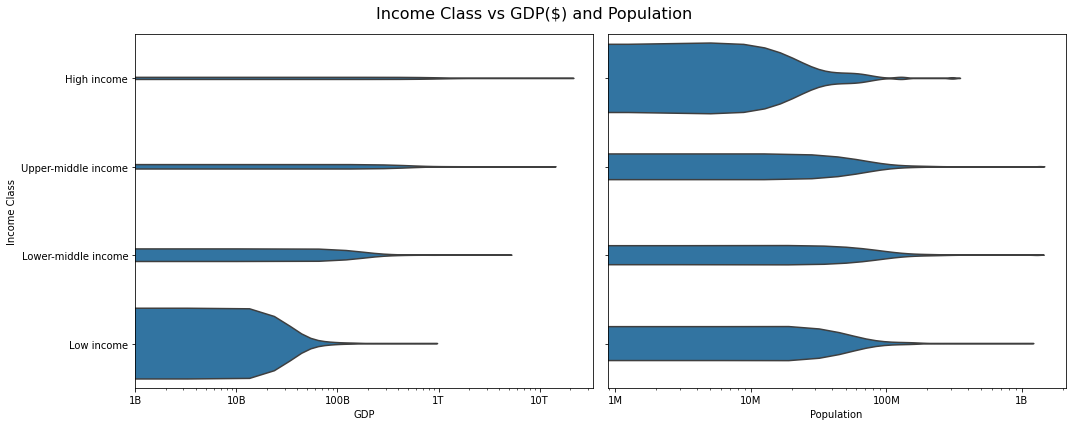

There are many points of low population for high income class


In [10]:
plot_violin('Income Class', order=False)

print('There are many points of low population for high income class')

## GDP and Population Distribution by Regions
Here we see that some of the regions with high GDP point do not have a high population point

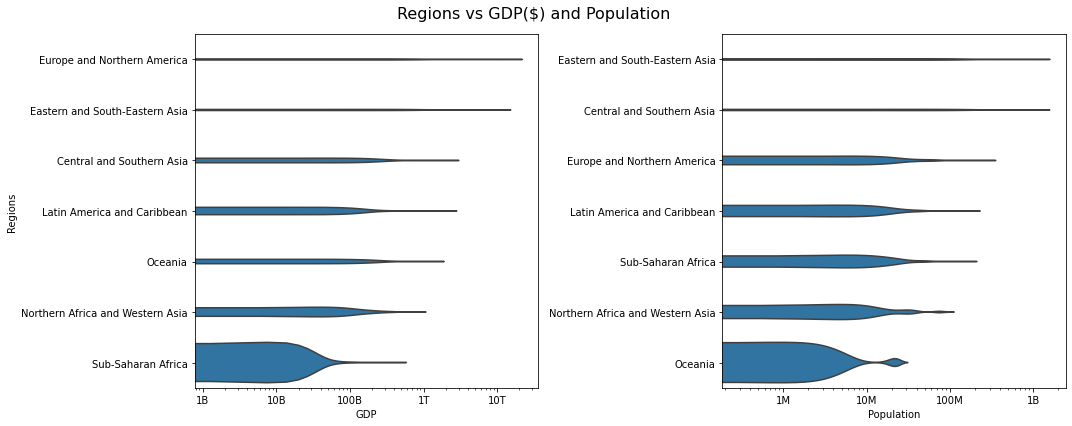

Central and Southern Asia has the third highest GDP point


In [11]:
plot_violin('Regions', order=True)

print('Central and Southern Asia has the third highest GDP point')

In the last two slides, we saw that the distribution of the regions and income levels were mostly concentrated at the base of the violin plots and the violins appeared to all have outliers. However, a good way to understand the distribution of the GDP is to engineer the GDP Per Capita.

## GDP Per Capita

This is a feature which tells us the approximate amount each member of a country earns. It is calculated by dividing the GDP with the Population.  

In [12]:
# derive the GDP Per Capita for each country and find the distribution.
economy['GDP Per Capita'] = economy['GDP'] / economy['Population']

In [13]:
region_order = economy.groupby(['Regions','Income Class'])['GDP Per Capita'].mean().reset_index()
region_order = region_order[region_order['Income Class'] == 'High income']
region_order = region_order.sort_values('GDP Per Capita', ascending=False)
region_order = region_order['Regions']

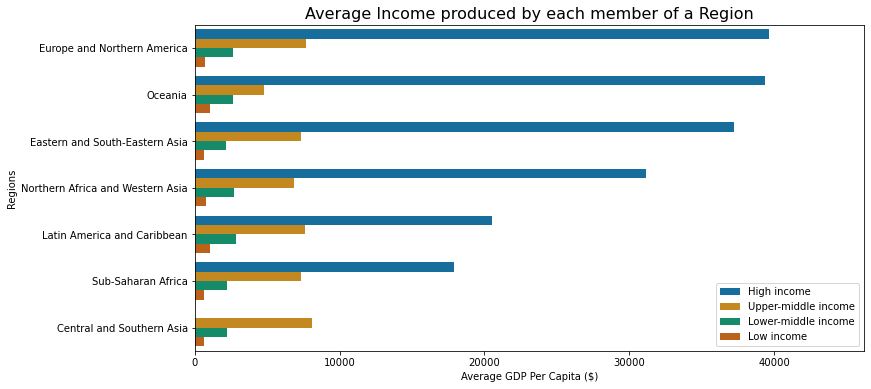

The average GDP Per Capita for the income classes have a close range excluding the high income class 
 
Central and Southern Asia has no high income bar


In [14]:
plt.figure(figsize=(12,6))

sb.barplot(data=economy, y='Regions', x='GDP Per Capita', hue='Income Class', errwidth=0,
           palette='colorblind', order=region_order) 
plt.xlabel('Average GDP Per Capita ($)')
plt.title('Average Income produced by each member of a Region', fontsize=16)
plt.legend(loc='lower right')

plt.show()
print('The average GDP Per Capita for the income classes have a close range excluding the high income class \n \nCentral and Southern Asia has no high income bar')

## Summary

We saw that the distribution of GDP in the dataset was fairly normal with most of the observations around 10B dollars. We also saw that GDP was positively correlated with Urban population and people continued to migrate from Rural to Urban areas yearly.

## Summary

There was a fall in the GDP in 2015 and it did not rise again until 2017. We concluded that a non linear correlation will be needed to identify the cause of the fall as the linear correlation did not give us any information.

## Summary

Finally, we saw that there was a huge gap in average GDP Per Capita between high income and the other income classes for all regions except Central and Southern Asia region which had no record for high income.

## Summary
The huge gap explained why the violin plots were really narrow at the top. It also suggests that the dollar range for high income maybe increasing at a higher rate than the dollar range for the other income classes.

# *Thank You!*

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert World_GDP_Presentation.ipynb --to slides --post serve --no-input --no-prompt